In [ ]:
%%time
import pandas as pd
from strategy import Strategy
from league import League
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")
PRIORITY_LEAGUES_FILE = "files/prio_leagues.csv"

#df = None
#for f in [f for f in os.listdir("leagues") if '.csv' in f]:
#    print(f)
#    df = pd.concat([df, pd.read_csv(f"leagues/{f}")])

df = Strategy.load_dataset()
#priority = pd.read_csv(PRIORITY_LEAGUES_FILE, sep=';')
#priority = priority[priority["Prioritaire"] == 'OUI'][['Country', 'League']].apply(tuple, 1)
#df['country/league'] = df[['country', 'league']].apply(tuple, 1)
#df = df[df['country/league'].isin(priority)].reset_index(drop=True)
#df = df[df.season=="21-22"].reset_index(drop=True)
df['result'] = df[['score_ft_1', 'score_ft_2']].apply(lambda x: League.cpt_winner(x[0], x[1]), axis=1)
df['result_ht'] = df[['score_ht_1', 'score_ht_2']].apply(lambda x: League.cpt_winner(x[0], x[1]), axis=1)
df['result_UO'] = df[['score_ft_1', 'score_ft_2']].apply(lambda x: 'U' if (x[0] + x[1]) < 2.5 else 'O', axis=1)
df[['bet365_1', 'bet365_2']].info()
#df.to_csv('db.csv')

100%|█████████████████████████████████████████████████████| 401/401 [00:15<00:00, 25.50it/s]


In [1]:
import os
strategies = os.listdir('strategies')
print(f"NUMBER: {len(strategies)}")
strategies.sort(key=lambda x: - os.path.getmtime(f'strategies/{x}'))
for s in strategies:
    print(s)
print()

FileNotFoundError: [Errno 2] No such file or directory: 'strategies'

In [24]:
dic = {}
for s in strategies:
    if '_U.json' in s:
        strategy = Strategy.load_strategy_from_file(f'strategies/{s}')
        matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
        print(s)
        print(strategy)
        result = strategy.get('result')
        matches = matches.reset_index(drop=True)
        #matches.result = matches.result.astype(str)
        strategy_stats = {}
        strategy_stats["strategy"] = strategy
        strategy_stats["n_matches"] = len(matches)
        strategy_stats["total_revenue"] = Strategy.compute_revenue(matches, strategy)
        strategy_stats["roi"] = strategy_stats["total_revenue"] / len(matches) * 100
        strategy_stats["n_wins"] = len(matches[matches.result == result])
        if len(matches) > 0:
            strategy_stats["winning_rate"] = len(matches[matches.result == result]) / len(matches) * 100
        strategy_stats["avg_odd"] = matches[f'bet365_{result}'].mean()

        print(strategy_stats)
        print()
        dic[s] = strategy_stats

        #print(f'Number of matches: {len(matches)}')
        #print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
        #print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
        #print(f'Winning bets: {len(matches[matches.result == result])} / {len(matches)}')
        #print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
        #print(f"Average odd: {matches[f'bet365_{result}'].mean()}")


strategy_GA_rank_1__3M_G_coeff_rank_2__U.json
{'GA_rank_1': [4, 17], '3M_G_coeff_rank_2': [2, 8], 'result': 'U', 'bet365_U': [2.91, 3.58]}
{'strategy': {'GA_rank_1': [4, 17], '3M_G_coeff_rank_2': [2, 8], 'result': 'U', 'bet365_U': [2.91, 3.58]}, 'n_matches': 737, 'total_revenue': 27.279999999999973, 'roi': 3.7014925373134293, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 3.248059701492531}

strategy_P_rank_1__H_G_rank_2__U.json
{'P_rank_1': [8, 25], 'H_G_rank_2': [18, 27], 'result': 'U', 'bet365_U': [2.2, 7.23]}
{'strategy': {'P_rank_1': [8, 25], 'H_G_rank_2': [18, 27], 'result': 'U', 'bet365_U': [2.2, 7.23]}, 'n_matches': 801, 'total_revenue': 17.149999999999977, 'roi': 2.1410736579275875, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 2.484182272159793}

strategy_G_rank_1__GA_rank_2__U.json
{'G_rank_1': [7, 19], 'GA_rank_2': [1, 7], 'result': 'U', 'bet365_U': [2.44, 11.78]}
{'strategy': {'G_rank_1': [7, 19], 'GA_rank_2': [1, 7], 'result': 'U', 'bet365_U': [2.44, 11.78]}, 'n_matches': 19

{'strategy': {'G_rank_1': [1, 21], '3M_A_G_rank_2': [17, 22], 'result': 'U', 'bet365_U': [3.0300000000000002, 4.48]}, 'n_matches': 251, 'total_revenue': 41.72999999999999, 'roi': 16.625498007968122, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 3.5066932270916396}

strategy_H_P_rank_1__3M_P_coeff_rank_2__U.json
{'H_P_rank_1': [8, 13], '3M_P_coeff_rank_2': [11, 17], 'result': 'U', 'bet365_U': [3.33, 9.69]}
{'strategy': {'H_P_rank_1': [8, 13], '3M_P_coeff_rank_2': [11, 17], 'result': 'U', 'bet365_U': [3.33, 9.69]}, 'n_matches': 155, 'total_revenue': 29.860000000000014, 'roi': 19.264516129032266, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 3.6803225806451603}

strategy_H_P_rank_1__3M_A_G_coeff_rank_2__U.json
{'H_P_rank_1': [3, 11], '3M_A_G_coeff_rank_2': [16, 20], 'result': 'U', 'bet365_U': [3.0300000000000002, 4.46]}
{'strategy': {'H_P_rank_1': [3, 11], '3M_A_G_coeff_rank_2': [16, 20], 'result': 'U', 'bet365_U': [3.0300000000000002, 4.46]}, 'n_matches': 271, 'total_revenue': 71.329999999

strategy_3M_H_GA_rank_1__A_G_rank_2__U.json
{'3M_H_GA_rank_1': [9, 10], 'A_G_rank_2': [10, 13], 'result': 'U', 'bet365_U': [2.4699999999999998, 7.220000000000001]}
{'strategy': {'3M_H_GA_rank_1': [9, 10], 'A_G_rank_2': [10, 13], 'result': 'U', 'bet365_U': [2.4699999999999998, 7.220000000000001]}, 'n_matches': 265, 'total_revenue': -5.05000000000004, 'roi': -1.9056603773585055, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 2.8572830188679292}

strategy_3M_P_coeff_rank_1__A_G_rank_2__U.json
{'3M_P_coeff_rank_1': [11, 26], 'A_G_rank_2': [1, 18], 'result': 'U', 'bet365_U': [2.95, 4.45]}
{'strategy': {'3M_P_coeff_rank_1': [11, 26], 'A_G_rank_2': [1, 18], 'result': 'U', 'bet365_U': [2.95, 4.45]}, 'n_matches': 963, 'total_revenue': 60.59999999999991, 'roi': 6.292834890965722, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 3.405295950155746}

strategy_A_GA_rank_1__A_G_rank_2__U.json
{'A_GA_rank_1': [10, 15], 'A_G_rank_2': [5, 17], 'result': 'U', 'bet365_U': [3.39, 8.97]}
{'strategy': {'A_GA_rank_

strategy_3M_GA_coeff_rank_1__3M_GA_rank_2__U.json
{'3M_GA_coeff_rank_1': [6, 13], '3M_GA_rank_2': [10, 16], 'result': 'U', 'bet365_U': [2.98, 4.2]}
{'strategy': {'3M_GA_coeff_rank_1': [6, 13], '3M_GA_rank_2': [10, 16], 'result': 'U', 'bet365_U': [2.98, 4.2]}, 'n_matches': 571, 'total_revenue': 83.91999999999996, 'roi': 14.6970227670753, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 3.4285464098073524}

strategy_3M_H_P_rank_1__P_rank_2__U.json
{'3M_H_P_rank_1': [7, 12], 'P_rank_2': [20, 28], 'result': 'U', 'bet365_U': [1.94, 11.43]}
{'strategy': {'3M_H_P_rank_1': [7, 12], 'P_rank_2': [20, 28], 'result': 'U', 'bet365_U': [1.94, 11.43]}, 'n_matches': 717, 'total_revenue': 43.210000000000036, 'roi': 6.026499302649936, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 2.2778661087866077}

strategy_3M_G_coeff_rank_1__A_G_rank_2__U.json
{'3M_G_coeff_rank_1': [8, 28], 'A_G_rank_2': [1, 21], 'result': 'U', 'bet365_U': [2.91, 4.67]}
{'strategy': {'3M_G_coeff_rank_1': [8, 28], 'A_G_rank_2': [1, 21], 'r

strategy_P_rank_1__3M_A_GA_rank_2__U.json
{'P_rank_1': [7, 14], '3M_A_GA_rank_2': [1, 25], 'result': 'U', 'bet365_U': [2.98, 4.5600000000000005]}
{'strategy': {'P_rank_1': [7, 14], '3M_A_GA_rank_2': [1, 25], 'result': 'U', 'bet365_U': [2.98, 4.5600000000000005]}, 'n_matches': 1009, 'total_revenue': 105.90000000000009, 'roi': 10.495540138751249, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 3.4156491575817483}

strategy_3M_P_rank_1__GA_rank_2__U.json
{'3M_P_rank_1': [10, 28], 'GA_rank_2': [1, 10], 'result': 'U', 'bet365_U': [2.79, 6.91]}
{'strategy': {'3M_P_rank_1': [10, 28], 'GA_rank_2': [1, 10], 'result': 'U', 'bet365_U': [2.79, 6.91]}, 'n_matches': 943, 'total_revenue': -1.6299999999999955, 'roi': -0.17285259809119782, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 3.2451961823965805}

strategy_H_GA_rank_1__A_G_rank_2__U.json
{'H_GA_rank_1': [3, 22], 'A_G_rank_2': [15, 18], 'result': 'U', 'bet365_U': [3.35, 5.359999999999999]}
{'strategy': {'H_GA_rank_1': [3, 22], 'A_G_rank_2': [15, 18]

strategy_3M_H_P_coeff_rank_1__H_P_rank_2__U.json
{'3M_H_P_coeff_rank_1': [12, 18], 'H_P_rank_2': [2, 18], 'result': 'U', 'bet365_U': [3.19, 4.91]}
{'strategy': {'3M_H_P_coeff_rank_1': [12, 18], 'H_P_rank_2': [2, 18], 'result': 'U', 'bet365_U': [3.19, 4.91]}, 'n_matches': 335, 'total_revenue': 59.01999999999998, 'roi': 17.61791044776119, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 3.621194029850752}

strategy_3M_G_rank_1__3M_A_G_coeff_rank_2__U.json
{'3M_G_rank_1': [9, 24], '3M_A_G_coeff_rank_2': [1, 20], 'result': 'U', 'bet365_U': [2.99, 4.66]}
{'strategy': {'3M_G_rank_1': [9, 24], '3M_A_G_coeff_rank_2': [1, 20], 'result': 'U', 'bet365_U': [2.99, 4.66]}, 'n_matches': 1015, 'total_revenue': 46.549999999999955, 'roi': 4.58620689655172, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 3.4007290640393886}

strategy_P_rank_1__3M_P_rank_2__U.json
{'P_rank_1': [9, 14], '3M_P_rank_2': [1, 17], 'result': 'U', 'bet365_U': [3.0, 4.37]}
{'strategy': {'P_rank_1': [9, 14], '3M_P_rank_2': [1, 17], 'resu

strategy_P_rank_1__A_GA_rank_2__U.json
{'P_rank_1': [9, 13], 'A_GA_rank_2': [1, 25], 'result': 'U', 'bet365_U': [2.89, 7.49]}
{'strategy': {'P_rank_1': [9, 13], 'A_GA_rank_2': [1, 25], 'result': 'U', 'bet365_U': [2.89, 7.49]}, 'n_matches': 622, 'total_revenue': 65.86000000000001, 'roi': 10.588424437299038, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 3.4283440514469414}

strategy_3M_H_P_coeff_rank_1__G_rank_2__U.json
{'3M_H_P_coeff_rank_1': [7, 18], 'G_rank_2': [1, 6], 'result': 'U', 'bet365_U': [2.75, 4.45]}
{'strategy': {'3M_H_P_coeff_rank_1': [7, 18], 'G_rank_2': [1, 6], 'result': 'U', 'bet365_U': [2.75, 4.45]}, 'n_matches': 1271, 'total_revenue': -47.5, 'roi': -3.7372147915027534, 'n_wins': 0, 'winning_rate': 0.0, 'avg_odd': 3.184209284028302}

strategy_G_rank_1__3M_GA_rank_2__U.json
{'G_rank_1': [10, 14], '3M_GA_rank_2': [2, 15], 'result': 'U', 'bet365_U': [2.63, 12.0]}
{'strategy': {'G_rank_1': [10, 14], '3M_GA_rank_2': [2, 15], 'result': 'U', 'bet365_U': [2.63, 12.0]}, 'n_matche

In [26]:
dic = dict(sorted(dic.items(), key=lambda item: - item[1]["total_revenue"]))
for k, v in dic.items():
    print(f"'{k}',")
    #print(dic[k])
    print()

    

'strategy_3M_GA_coeff_rank_1__A_GA_rank_2__U.json',

'strategy_G_rank_1__3M_A_GA_coeff_rank_2__U.json',

'strategy_P_rank_1__3M_A_GA_rank_2__U.json',

'strategy_3M_G_coeff_rank_1__A_GA_rank_2__U.json',

'strategy_G_rank_1__3M_GA_rank_2__U.json',

'strategy_A_G_rank_1__H_P_rank_2__U.json',

'strategy_3M_H_GA_coeff_rank_1__3M_A_P_coeff_rank_2__U.json',

'strategy_3M_G_coeff_rank_1__3M_GA_coeff_rank_2__U.json',

'strategy_3M_G_coeff_rank_1__3M_GA_rank_2__U.json',

'strategy_P_rank_1__H_GA_rank_2__U.json',

'strategy_3M_P_coeff_rank_1__3M_A_GA_rank_2__U.json',

'strategy_3M_GA_rank_1__GA_rank_2__U.json',

'strategy_3M_GA_coeff_rank_1__3M_GA_rank_2__U.json',

'strategy_G_rank_1__3M_G_coeff_rank_2__U.json',

'strategy_P_rank_1__3M_G_coeff_rank_2__U.json',

'strategy_P_rank_1__3M_P_rank_2__U.json',

'strategy_3M_P_coeff_rank_1__3M_P_coeff_rank_2__U.json',

'strategy_3M_H_GA_rank_1__3M_P_rank_2__U.json',

'strategy_G_rank_1__3M_A_P_rank_2__U.json',

'strategy_3M_H_GA_rank_1__3M_A_GA_rank_2__U.

In [27]:
STRATEGY = 'strategy_3M_GA_coeff_rank_1__A_GA_rank_2__U.json'

In [28]:
strategy = Strategy.load_strategy_from_file(f'strategies/{STRATEGY}')
strategy

{'3M_GA_coeff_rank_1': [7, 14],
 'A_GA_rank_2': [11, 21],
 'result': 'U',
 'bet365_U': [3.39, 4.28]}

In [29]:
matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
result = strategy.get('result')
matches = matches.reset_index(drop=True)
for key, value in dic[STRATEGY].items():
    print(key, ' : ', value)

strategy  :  {'3M_GA_coeff_rank_1': [7, 14], 'A_GA_rank_2': [11, 21], 'result': 'U', 'bet365_U': [3.39, 4.28]}
n_matches  :  420
total_revenue  :  131.74
roi  :  31.36666666666667
n_wins  :  0
winning_rate  :  0.0
avg_odd  :  3.629333333333338


In [30]:
print('Odds distribution')
print(matches[f'bet365_{result}'].value_counts())

Odds distribution
3.40    126
3.50     90
3.60     79
4.00     77
4.20     30
3.39     13
3.75      4
3.45      1
Name: bet365_U, dtype: int64


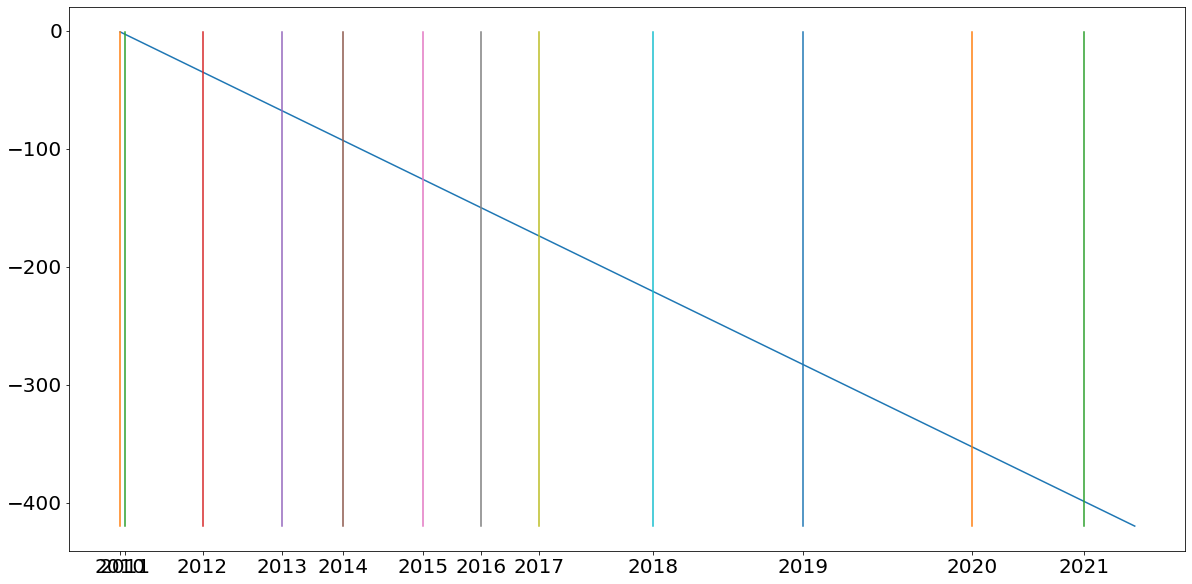

In [33]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 20})
matches.cum_gain.plot()
index = []
label = []
for i in range(2010, 2023):
    x = matches[matches.date >= str(i)]
    if len(x) > 0:
        x = x.index[0]
    else:
        continue
    plt.plot([x, x], [matches.cum_gain.min(), matches.cum_gain.max()])
    index.append(x),
    label.append(str(i))
xticks = plt.xticks(index, label)

<AxesSubplot:xlabel='year'>

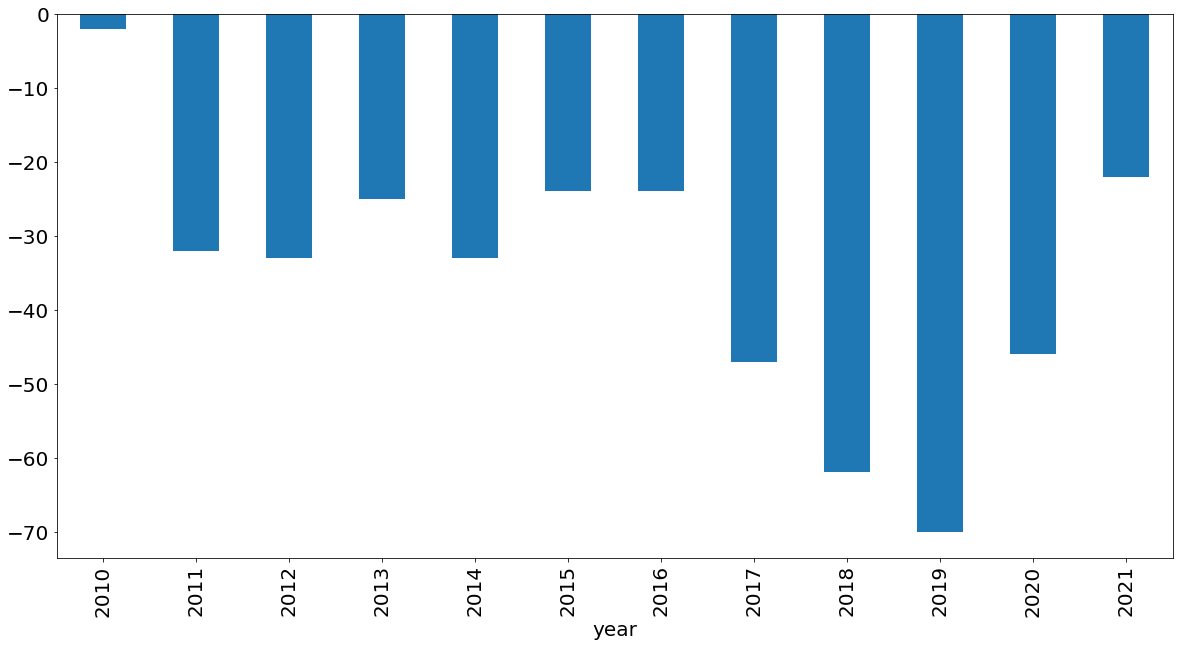

In [34]:
gain_by_year.plot.bar()

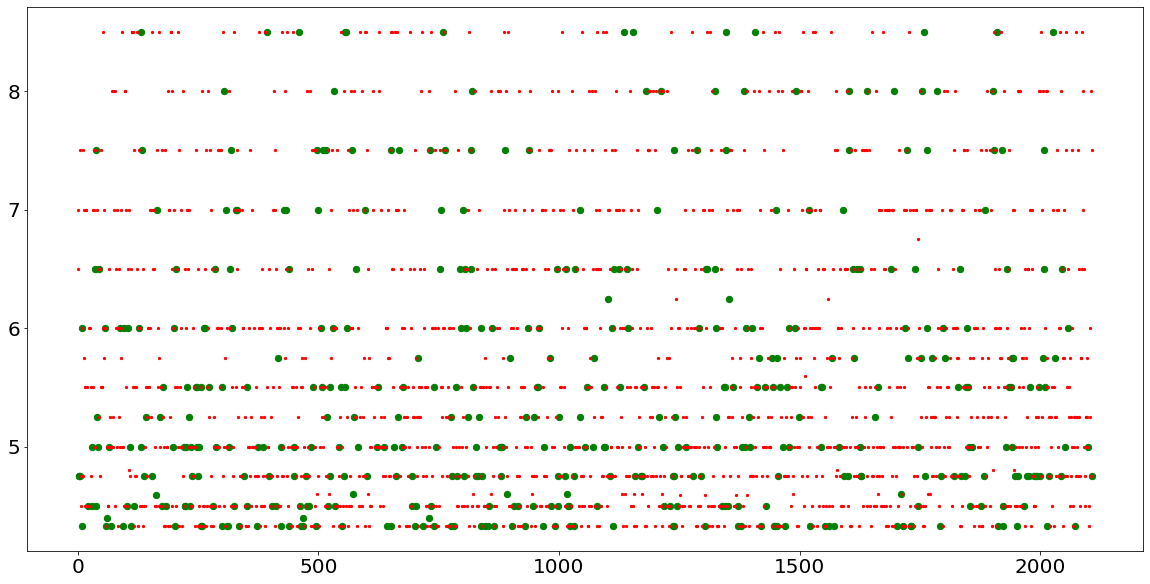

In [200]:
plt.scatter(x = matches[matches.gain > 0].index, y=matches[matches.gain > 0][f"bet365_{strategy.get('result')}"], s=40, color='green')
plt.scatter(x = matches[matches.gain < 0].index, y=matches[matches.gain < 0][f"bet365_{strategy.get('result')}"], color='red', s=5)

<AxesSubplot:xlabel='country'>

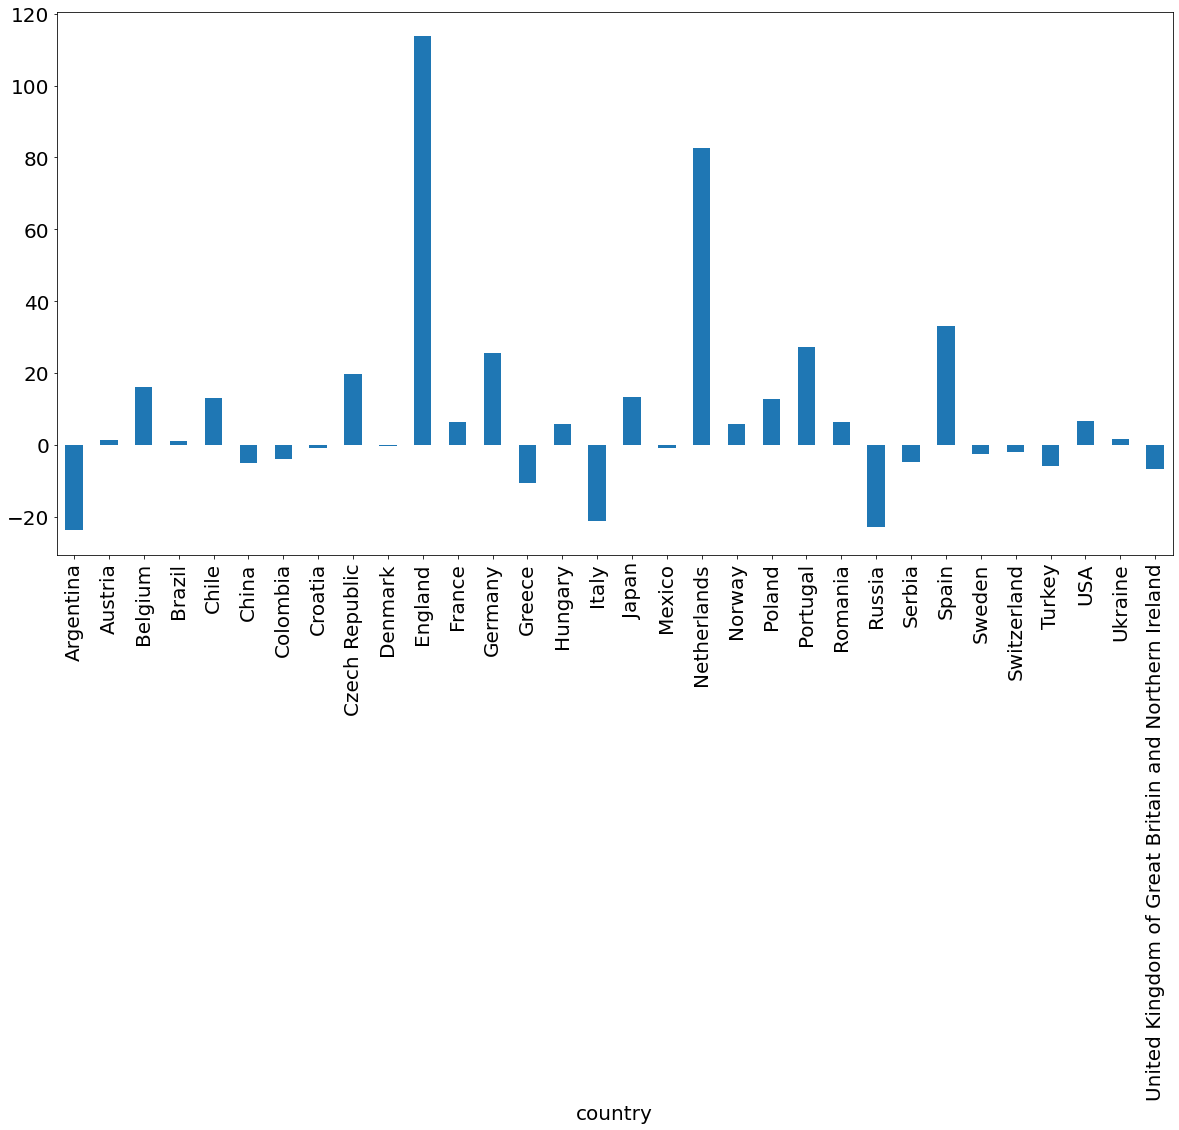

In [201]:
gain_by_country = matches.groupby(by='country')["gain"]
gain_by_country.sum().plot.bar()

<AxesSubplot:xlabel='league'>

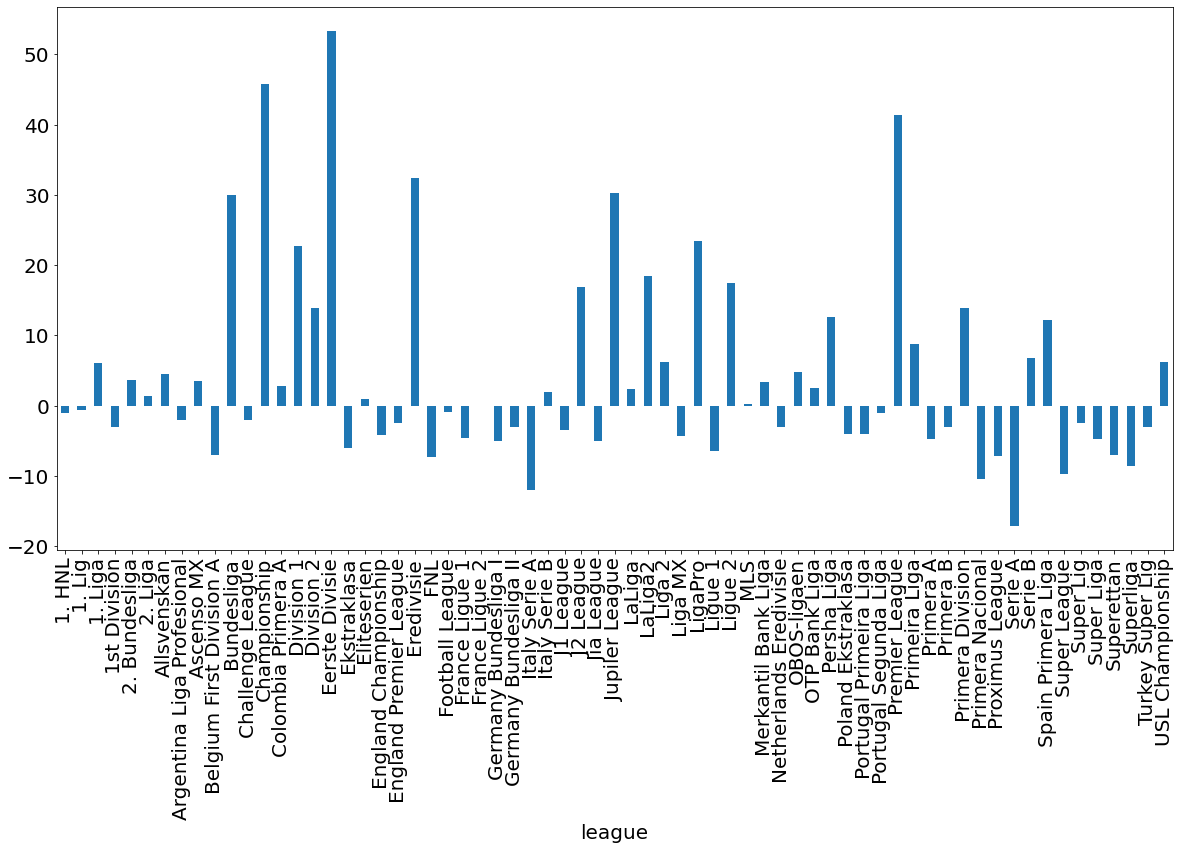

In [202]:
gain_by_league = matches.groupby(by='league')["gain"].sum()
gain_by_league.plot.bar()